In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_excel(r'C:\Users\Arpita\Desktop\avocado.xlsx')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
#Checking the Data dimesion
df.shape

(18249, 14)

In [4]:
df.columns

Index([  'Unnamed: 0',         'Date', 'AveragePrice', 'Total Volume',
                 4046,           4225,           4770,   'Total Bags',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year',       'region'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


The Feature "Unnamed:0" is only a portrayal of the files, so it's futile to keep it, lets eliminate it !

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Using the info method to get an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


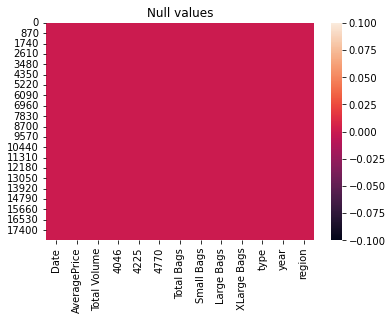

In [11]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

We don't have any missing values (18249 complete information) and 13 columns. But in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [12]:
#checking the skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [14]:
#Changing the date column to date type from object

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Data Visualization

Text(0.5, 1.0, 'Average Price')

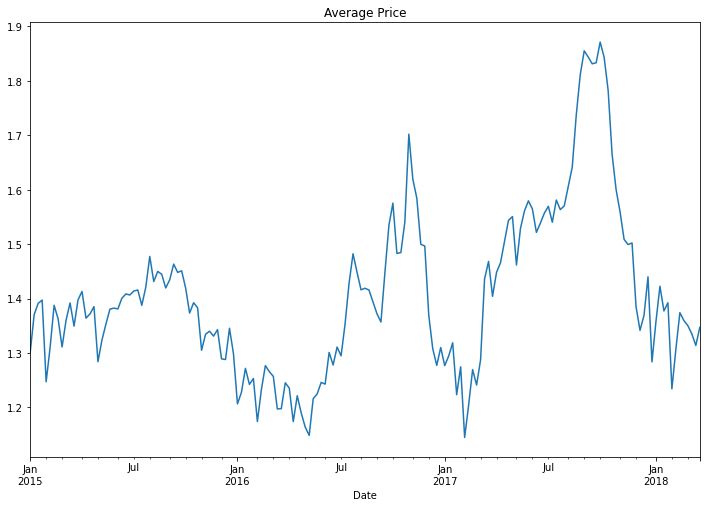

In [16]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Avg Price of Avocado With Respect To Region')

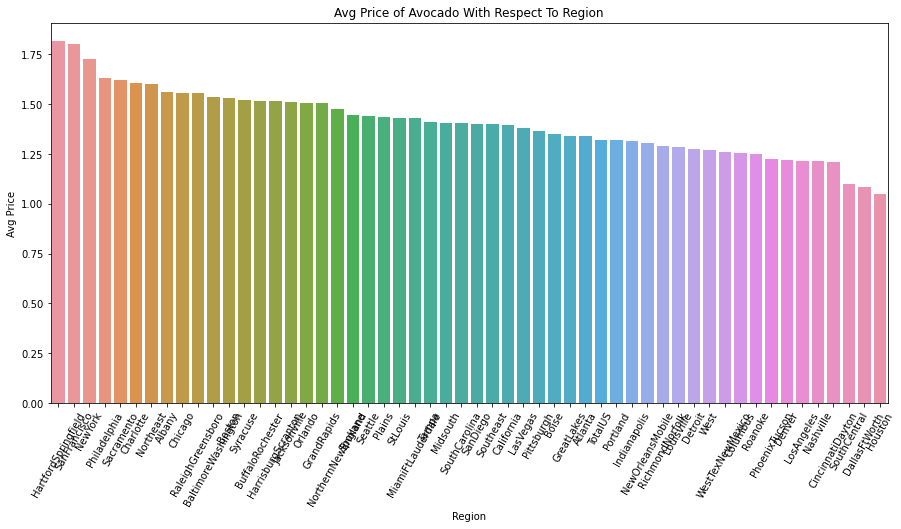

In [17]:
#Lets see What are the TOP Six regions where Average price are very high?

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,7))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Avg Price')
plt.title('Avg Price of Avocado With Respect To Region')

It seems that in these regions the price is very high

-  Syracuse
-  Charlotte
-  BuffaloRochester
-  Philadelphia
-  St Louis
-  New York

Text(0.5, 1.0, 'Avg of Total Volume With Respect to Region')

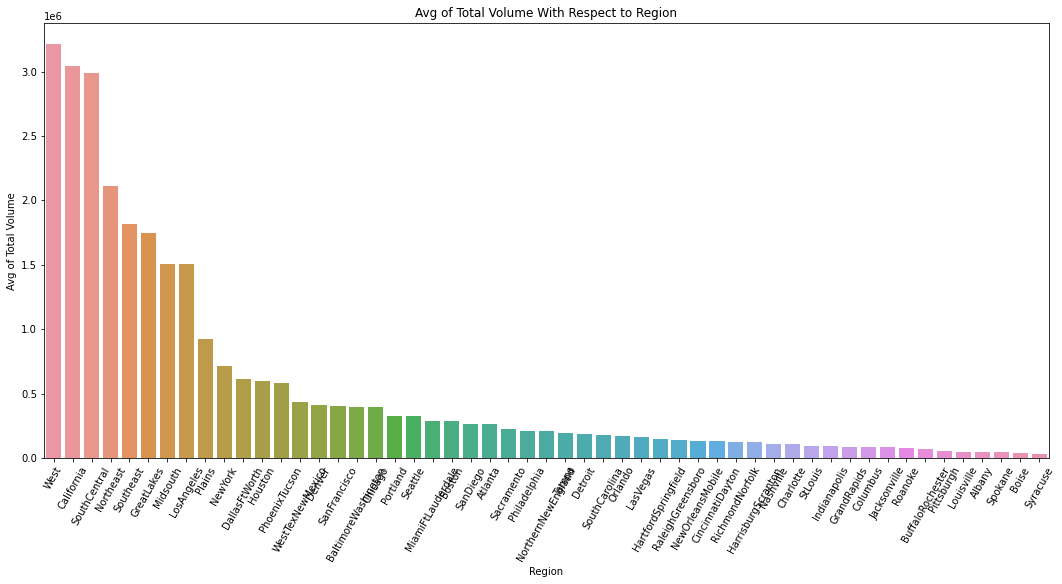

In [18]:
#Lets see What are TOP six regions where Average consumption is very high

filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(18,8))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Avg of Total Volume')
plt.title('Avg of Total Volume With Respect to Region')

It seems like in these region the Consumption is very high:

-  California
-  West
-  South central
-  NorthEast
-  GreatLakes
-  SouthEast

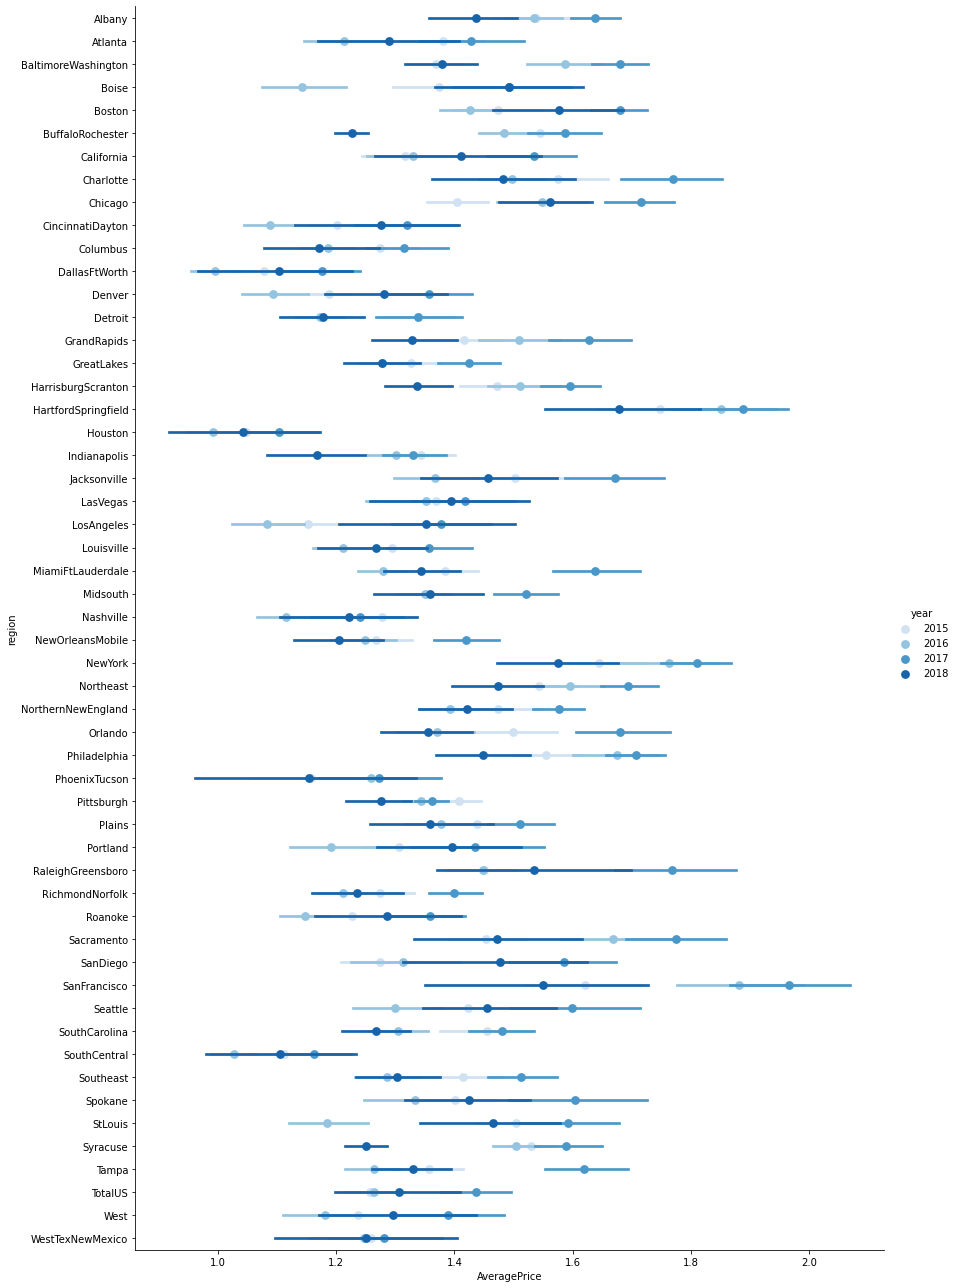

In [19]:
# Lets see In which year and for which region was the Average price the highest

g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

<AxesSubplot:xlabel='AveragePrice'>

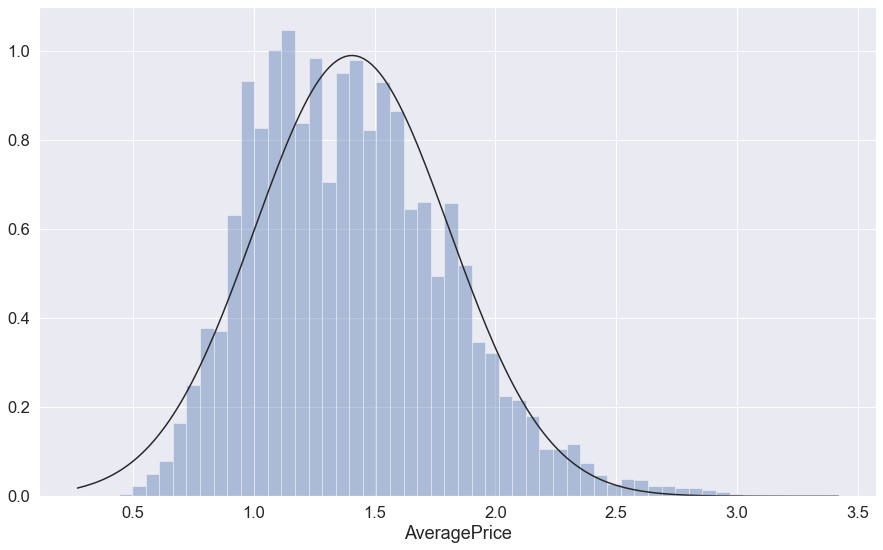

In [20]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

# Checking Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

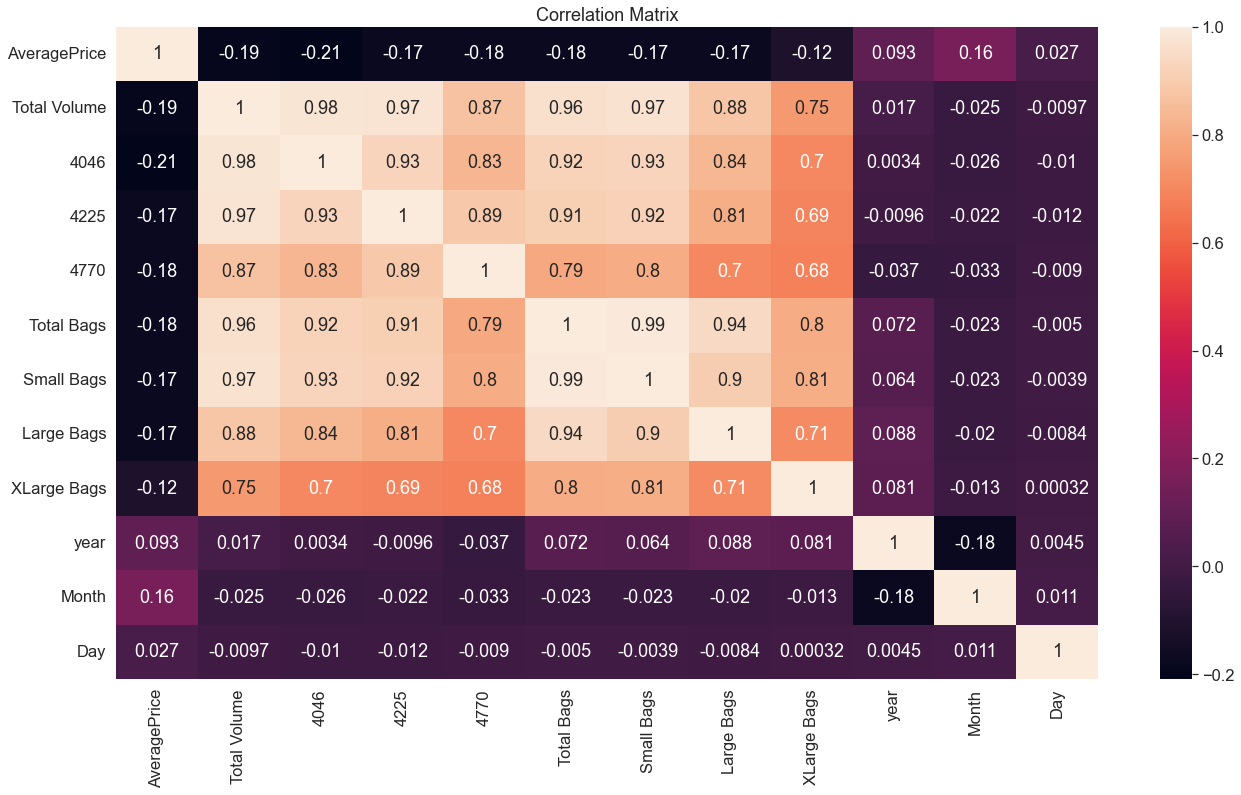

In [21]:
plt.figure(figsize=[22,12])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

As we can from the heatmap above, every one of the Features is not correlated with the Average Price segment, all things being equal, the majority of them are correlated with one another.

In [22]:
df['region'].nunique()

54

In [23]:
df['type'].nunique()

2

As we can see we have 54 regions and 2 unique type, so we don't really require the Type column, however for the Region it will be somewhat unpredictable so its better to drop the whole column as it won't impact much in my model. I will drop the Date Feature too in light of the fact that I as of now have 3 different columns for the Year, Month and Day.

In [24]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [25]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [26]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


# Random State Selection

In [57]:
x=df_final.drop('AveragePrice', axis=1)
y=df_final['AveragePrice']

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import r2_score

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test= LR.predict(x_test)
    print(f'at random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'at random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

at random state 1, the training accuracy is: 0.44068732310865466
at random state 1, the testing accuracy is: 0.4346370648379345


at random state 2, the training accuracy is: 0.4432737041640742
at random state 2, the testing accuracy is: 0.42816029914494336


at random state 3, the training accuracy is: 0.4376830699751256
at random state 3, the testing accuracy is: 0.44168567884551835


at random state 4, the training accuracy is: 0.4421210538485567
at random state 4, the testing accuracy is: 0.43057282117126594


at random state 5, the training accuracy is: 0.437308480360838
at random state 5, the testing accuracy is: 0.4415707248877979


at random state 6, the training accuracy is: 0.43204038911857234
at random state 6, the testing accuracy is: 0.4540659326984897


at random state 7, the training accuracy is: 0.43801957264043445
at random state 7, the testing accuracy is: 0.44044651583916306


at random state 8, the training accuracy is: 0.44007658174126507
at random state 8, the tes

# MODEL SELECTION

In [58]:
# Using Liner Regression
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [59]:
#Creating & Training the Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22937371534355808
MSE: 0.08834604630417635
RMSE: 0.29723062813945733


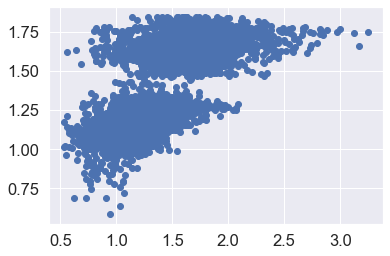

In [61]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

As we can see that it has a straight line. So we will go with this.

,Y Test,Pred
2258,1.29,1.130532
11669,1.93,1.487433
14336,1.44,1.716795
8514,1.28,1.205073
8545,1.32,1.169315


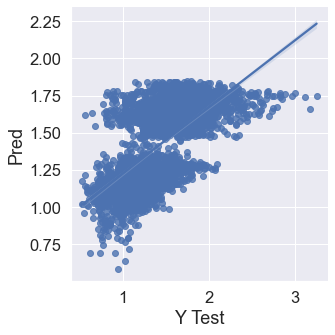

In [62]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [63]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.09878583561643836
MSE: 0.020185549832876713
RMSE: 0.14207585943036458


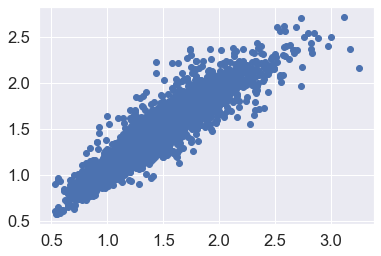

In [65]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
2258,1.29,1.1504
11669,1.93,1.8230
14336,1.44,1.4237
8514,1.28,1.2446
8545,1.32,1.1171


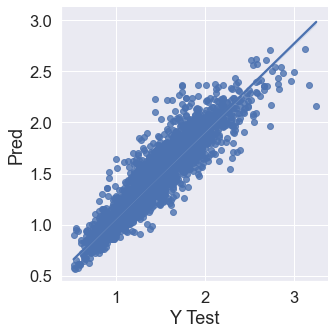

In [66]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [67]:
#Using Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13273698630136987
MSE: 0.040780136986301375
RMSE: 0.20194092449600545


Text(0, 0.5, 'Predicted Y')

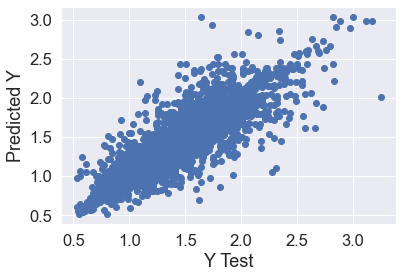

In [69]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

,Y Test,Pred
2258,1.29,1.08
11669,1.93,1.93
14336,1.44,1.35
8514,1.28,1.26
8545,1.32,1.28


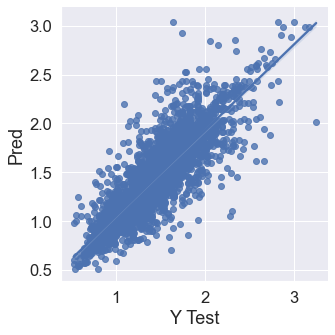

In [70]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Checking Cross Validation Score

In [71]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LinearRegression(),X,y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : -10.832077772294742


In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( RandomForestRegressor(),X,y, cv=5)
print('Cross validation score of  RandomForestRegressor model :',scr.mean())

Cross validation score of  RandomForestRegressor model : 0.20385320154384887


In [73]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( DecisionTreeRegressor(),X,y, cv=5)
print('Cross validation score of  DecisionTreeRegressor model :',scr.mean())

Cross validation score of  DecisionTreeRegressor model : -0.24892232175244566


# Conclusion
-  Random Forest Regressor has the lowest RMSE value which means it was a good fit for our data.
-  BY calculating the differnce between the actual and predicted value we can see the Random Forest Regressor was the best fit for our data.
-  And also by the above graph representation the model predicted by Random forest regressor has less scattered value from the line.